In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import keras.backend as K
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from google.colab import files
uploaded = files.upload()

import io


Saving PETR4.SA.csv to PETR4.SA (2).csv


In [29]:
base = pd.read_csv('PETR4.SA.csv', index_col='Date', parse_dates=True)
base.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-19,17.98,18.04,17.82,17.94,17.19,25935900
2014-05-20,17.90,18.38,17.10,17.30,16.57,54506300
2014-05-21,17.46,17.82,17.10,17.46,16.73,40672100
2014-05-22,17.51,17.77,17.34,17.68,16.94,32321300
2014-05-23,17.58,17.83,17.55,17.70,16.96,18155800


In [30]:
base.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-13,26.21,26.47,25.82,25.90,25.90,43146100
2019-05-14,26.17,26.23,25.85,26.00,26.00,34968600
2019-05-15,25.74,25.89,25.66,25.88,25.88,37053900
2019-05-16,25.77,26.04,25.24,25.27,25.27,46502200
2019-05-17,25.05,25.42,24.47,24.68,24.68,67291200


In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)
base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1244.00,15.44,5.91,4.20,10.57,14.95,19.46,29.55
High,1244.00,15.70,5.96,4.27,10.78,15.12,19.75,29.60
Low,1244.00,15.16,5.84,4.12,10.21,14.60,19.06,28.98
Close,1244.00,15.41,5.90,4.20,10.55,14.85,19.35,29.25
Adj Close,1244.00,14.86,5.83,4.02,10.11,14.23,18.57,29.23
Volume,1244.00,55326164.23,34809547.67,0.00,37150300.00,49633600.00,66726225.00,698950612.00


In [32]:
base.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
base = base.dropna()
base.shape

(1244, 6)

Text(0.5, 0, 'Distribuição do Preço de Fechamento')

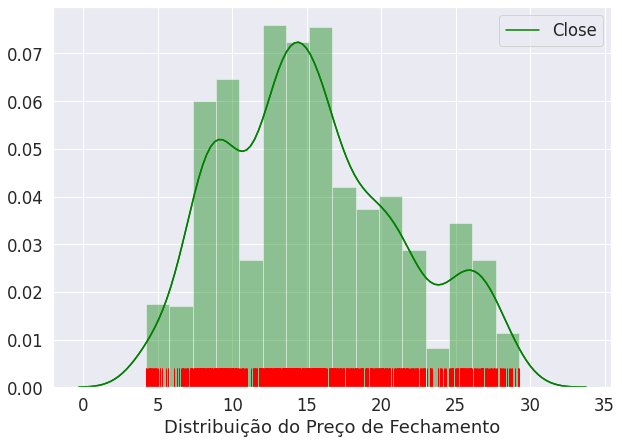

In [34]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc= {
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 18
})
sns.kdeplot(base['Close'], color = 'green')
sns.rugplot(base['Close'], color = 'red')
sns.distplot(base['Close'], color = 'green')
sns.set_style('darkgrid')
plt.xlabel('Distribuição do Preço de Fechamento')

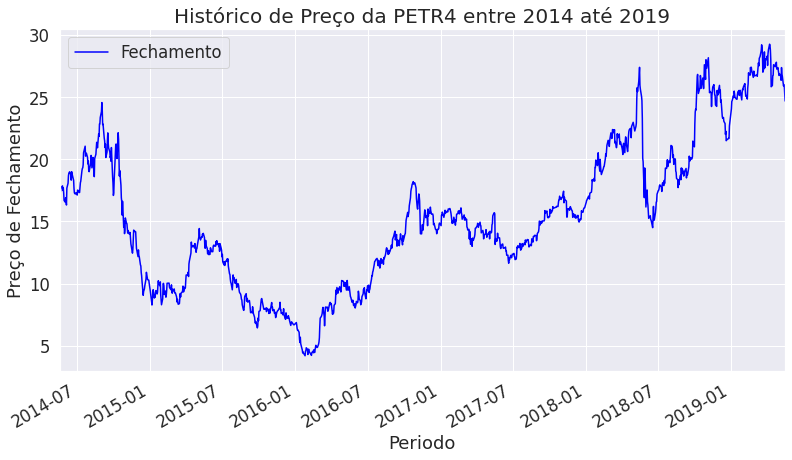

In [35]:
plt.figure(figsize=(13,7))
#base.iloc[:,0].plot(label = 'Abertura', color = 'red')
base.iloc[:,3].plot(label = 'Fechamento', color = 'blue')
plt.ylabel('Preço de Fechamento')
plt.xlabel('Periodo')
plt.title('Histórico de Preço da PETR4 entre 2014 até 2019')
plt.legend()

In [36]:
base = pd.read_csv('PETR4.SA.csv')
base.dropna(inplace=True)
base_treinamento = base.iloc[:,4:5].values
base_treinamento[0:10]

array([[17.940001],
       [17.299999],
       [17.459999],
       [17.68    ],
       [17.700001],
       [17.860001],
       [17.49    ],
       [17.700001],
       [17.299999],
       [16.690001]])

In [37]:
min_scaler = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = min_scaler.fit_transform(base_treinamento)
base_treinamento_normalizada[0:10]

array([[0.54850303],
       [0.52295405],
       [0.52934128],
       [0.53812375],
       [0.5389222 ],
       [0.54530942],
       [0.53053892],
       [0.5389222 ],
       [0.52295405],
       [0.49860283]])

In [0]:
previsores = []
preco_real = []
for i in range(90, len(base)):
  previsores.append(base_treinamento_normalizada[i-90:i,0])
  preco_real.append(base_treinamento_normalizada[i,0])

In [47]:
print('tamanho do ds criado de previsores', len(previsores))
print('\n')
previsores[0]

tamanho do ds criado de previsores 1154




array([0.54850303, 0.52295405, 0.52934128, 0.53812375, 0.5389222 ,
       0.54530942, 0.53053892, 0.5389222 , 0.52295405, 0.49860283,
       0.49301393, 0.50698603, 0.49500998, 0.48383234, 0.53812375,
       0.55369261, 0.57764471, 0.5860279 , 0.59041916, 0.58043912,
       0.56367265, 0.59081836, 0.57884236, 0.56287421, 0.53652691,
       0.52255493, 0.5237525 , 0.51896212, 0.52255493, 0.51856291,
       0.5157685 , 0.53173653, 0.53093812, 0.5237525 , 0.5241517 ,
       0.55528946, 0.56047904, 0.59481038, 0.6011976 , 0.60319357,
       0.61317361, 0.65149701, 0.66826351, 0.67265465, 0.64071856,
       0.64311373, 0.6502994 , 0.63672655, 0.6155689 , 0.6247505 ,
       0.59481038, 0.59081836, 0.61277441, 0.61876251, 0.64311373,
       0.63672655, 0.60319357, 0.63632731, 0.61756487, 0.57844315,
       0.5748503 , 0.63313369, 0.64670659, 0.66706587, 0.68502998,
       0.68263469, 0.66746507, 0.71217569, 0.70419162, 0.74411178,
       0.74411178, 0.7648703 , 0.78363273, 0.81277441, 0.78842

In [48]:
print('tamanho do ds criado de preco real', len(preco_real))
print('\n')
preco_real[0]

tamanho do ds criado de preco real 1154




0.6243512974051896

In [50]:
previsores, preco_real = np.array(previsores), np.array(preco_real)
print('Formato Previsores', previsores.shape)
print('\n')
print('Formato Preço_real', preco_real.shape)

Formato Previsores (1154, 90)


Formato Preço_real (1154,)


In [51]:
pd.concat([pd.DataFrame(previsores), pd.DataFrame(preco_real)], axis=1).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,0
0,0.55,0.52,0.53,0.54,0.54,0.55,0.53,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,...,0.59,0.61,0.62,0.64,0.64,0.60,0.64,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62
1,0.52,0.53,0.54,0.54,0.55,0.53,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,...,0.61,0.62,0.64,0.64,0.60,0.64,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67
2,0.53,0.54,0.54,0.55,0.53,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,0.65,...,0.62,0.64,0.64,0.60,0.64,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67,0.57
3,0.54,0.54,0.55,0.53,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,0.65,0.67,...,0.64,0.64,0.60,0.64,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67,0.57,0.55
4,0.54,0.55,0.53,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,0.65,0.67,0.67,...,0.64,0.60,0.64,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67,0.57,0.55,0.51
5,0.55,0.53,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,0.65,0.67,0.67,0.64,...,0.60,0.64,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67,0.57,0.55,0.51,0.52
6,0.53,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,0.65,0.67,0.67,0.64,0.64,...,0.64,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67,0.57,0.55,0.51,0.52,0.56
7,0.54,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,0.65,0.67,0.67,0.64,0.64,0.65,...,0.62,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67,0.57,0.55,0.51,0.52,0.56,0.65
8,0.52,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.52,0.52,0.56,0.56,0.59,0.60,0.60,0.61,0.65,0.67,0.67,0.64,0.64,0.65,0.64,...,0.58,0.57,0.63,0.65,0.67,0.69,0.68,0.67,0.71,0.70,0.74,0.74,0.76,0.78,0.81,0.79,0.74,0.74,0.70,0.69,0.67,0.68,0.64,0.65,0.69,0.72,0.68,0.67,0.65,0.64,0.64,0.62,0.67,0.57,0.55,0.51,0.52,0.56,0.65,0.68
9,0.50,0.49,0.51,0.50,0.48,0.54,0.55,0.58,0.59,0.59,0.58,0.56,0.59,0.58,0.56,0.54,0.52,0.52,0.52,0.52,0.52,0.52,

In [54]:
previsores = np.reshape(previsores, newshape= (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(1154, 90, 1)

In [55]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1, activation='linear'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [56]:
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [57]:
regressor.fit(previsores, preco_real, epochs=120, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/120





1154/1154 [==============================] - 13s 11ms/step - loss: 0.0369 - mean_absolute_error: 0.1366
Epoch 2/120
1154/1154 [==============================] - 11s 9ms/step - loss: 0.0088 - mean_absolute_error: 0.0684
Epoch 3/120
1154/1154 [==============================] - 11s 9ms/step - loss: 0.0080 - mean_absolute_error: 0.0661
Epoch 4/120
1154/1154 [==============================] - 11s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0636
Epoch 5/120
1154/1154 [==============================] - 11s 10ms/step - loss: 0.0069 - mean_absolute_error: 0.0604
Epoch 6/120
1154/1154 [==============================] - 11s 10ms/step - loss: 0.0109 - mean_absolute_error: 0.0773
Epoch 7/120
1154/1154 [==============================] - 11s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0562
Epoch 8/120
1154/1154 [==============================] - 11s 10ms/step - loss: 0.0059 - m

In [58]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 90, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 50)            30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 90, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [0]:
base_teste = pd.read_csv('PETR4.SA.csv')